In [1]:
import vedo
vedo.settings.default_backend='vtk'

In [2]:
import random
import numpy as np
import pandas as pd
from brainrender.actors import Points

In [18]:
popup_scene = Scene(atlas_name='allen_mouse_10um', title='popup')

brainglobe_atlasapi: allen_mouse_10um not found locally. Downloading...

Output()

In [ ]:
from brainrender import Scene
popup_scene = Scene(atlas_name='allen_mouse_50um', title='popup')

popup_scene.add_brain_region('VISp')

popup_scene.render()  # press 'Esc' to close

### Data preparation

In [7]:
cell_joined = pd.read_csv('./cell_zhuang_1.csv',dtype={"cell_label":str})

In [8]:
region = cell_joined[cell_joined['parcellation_division'] == 'Isocortex']
sections = ['Zhuang-ABCA-3.024', 'Zhuang-ABCA-3.023','Zhuang-ABCA-3.022', 'Zhuang-ABCA-3.021', 'Zhuang-ABCA-3.020']
filtered = region[region['brain_section_label'].isin(sections)]
filtered2 = region[~region['brain_section_label'].isin(sections)]

In [9]:
filtered['brain_section_label'].unique()


array(['Zhuang-ABCA-3.023', 'Zhuang-ABCA-3.024', 'Zhuang-ABCA-3.022',
       'Zhuang-ABCA-3.021', 'Zhuang-ABCA-3.020'], dtype=object)

In [10]:
filtered2['brain_section_label'].unique()


array(['Zhuang-ABCA-3.017', 'Zhuang-ABCA-3.016', 'Zhuang-ABCA-3.010',
       'Zhuang-ABCA-3.008', 'Zhuang-ABCA-3.003', 'Zhuang-ABCA-3.004',
       'Zhuang-ABCA-3.001', 'Zhuang-ABCA-3.015', 'Zhuang-ABCA-3.002',
       'Zhuang-ABCA-3.011', 'Zhuang-ABCA-3.019', 'Zhuang-ABCA-3.005',
       'Zhuang-ABCA-3.006', 'Zhuang-ABCA-3.012', 'Zhuang-ABCA-3.007',
       'Zhuang-ABCA-3.013', 'Zhuang-ABCA-3.009'], dtype=object)

### Illustration of 3D brain slices

**Shell**

In [11]:
import brainrender
from brainrender import Scene

In [12]:
brainrender.settings.DEFAULT_CAMERA = "top"  # Default camera settings (orientation etc. see brainrender.camera.py)
brainrender.settings.ROOT_ALPHA = 0.35  # transparency of the overall brain model's actor'
brainrender.settings.SHADER_STYLE = "plastic"  # affects the look of rendered brain regions: [metallic, plastic, shiny, glossy, cartoon]
brainrender.settings.SHOW_AXES = False

╭──────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                      │
│   brainrender.Actor:                                                                 │
│   ──────────────────────                                                             │
│                                                                                      │
│   name: Isocortex                                                                    │
│   type: brain region                                                                 │
│   ────────────────────────────────────────────────────────────────────────────────   │
│   center of mass: [6308 2747 5696]                                                   │
│   number of vertices: 31592                                                          │
│   dimensions: [ 1803 10373   150  5535   502 10873]                                  │
│   color: [0.43921569 1.         0.44313725]                                          │
│                                                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────╯
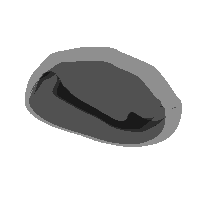

In [13]:
scene = Scene(atlas_name='allen_mouse_10um', title='')
scene.add_brain_region("Isocortex",alpha=0.25)
# mos = scene.add_brain_region("MOs",alpha=0.15)

In [11]:
def get_n_random_points_in_region(region, N):
    region_bounds = region.mesh.bounds()
    X = np.random.randint(region_bounds[0], region_bounds[1], size=10000)
    Y = np.random.randint(region_bounds[2], region_bounds[3], size=10000)
    Z = np.random.randint(region_bounds[4], region_bounds[5], size=10000)
    pts = [[x, y, z] for x, y, z in zip(X, Y, Z)]

    ipts = region.mesh.inside_points(pts).coordinates
    return np.vstack(random.choices(ipts, k=N))

In [ ]:
coordinates = get_n_random_points_in_region(mos,2000)
scene.add(Points(coordinates, name="CELLS",colors='steelblue'))
scene.slice("sagittal")
scene.render()

**Points**

In [10]:
test = pd.read_csv('./sag_data.csv',dtype={"cell_label":str})

In [ ]:
sections = ['Zhuang-ABCA-3.024','Zhuang-ABCA-3.023','Zhuang-ABCA-3.022','Zhuang-ABCA-3.021','Zhuang-ABCA-3.020']
#sections = ['Zhuang-ABCA-3.015','Zhuang-ABCA-3.016','Zhuang-ABCA-3.017']
filtered = test[test['brain_section_label'].isin(sections)]

In [ ]:
print(list(test))

In [17]:
cells = filtered[['x_ccf','y_ccf','z_ccf']]

In [18]:
cells2 = filtered2[['x_ccf','y_ccf','z_ccf']]

In [19]:
def read_in_cells(cells):
    x = cells['x_ccf'].tolist()
    y = cells['y_ccf'].tolist()
    z = cells['z_ccf'].tolist()

    x = [e*1000 for e in x]
    y = [e*1000 for e in y]
    z = [e*1000 for e in z]
    pts = [[x,y,z] for x,y,z in zip(x,y,z)]
    return np.vstack(pts)

╭──────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                      │
│   brainrender.Actor:                                                                 │
│   ──────────────────────                                                             │
│                                                                                      │
│   name: CELLS                                                                        │
│   type: Points                                                                       │
│   ────────────────────────────────────────────────────────────────────────────────   │
│   center of mass: [5838 1990 3819]                                                   │
│   number of vertices: 24165722                                                       │
│   dimensions: [ 1795 10386   151  5440  1898  5458]                                  │
│   color: [0.50196078 0.50196078 0.50196078]                                          │
│                                                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────╯
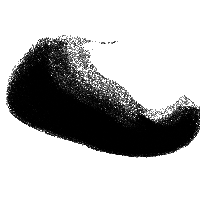

In [20]:
coordinates= read_in_cells(cells)
coordinates2= read_in_cells(cells2)
scene.add(Points(coordinates, name="CELLS",colors='crimson'))
scene.add(Points(coordinates2, name="CELLS",colors='grey',alpha=0.25))

In [ ]:
#scene.slice('sagittal')
scene.render()